![Picture for task](https://sun9-12.userapi.com/c857024/v857024004/14606b/EmFLhLUZ8xU.jpg)

### Задание 1. 
Сформировать выборку из 200 чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Пирсона.

$ y = {\sqrt{x}}$

$ a = 1, $ 
$ b = 5 $ 

In [154]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [155]:
a = 1
b = 5
n = 200
M = int(4 * np.log10(n))

In [156]:
#плотность распределения
f = lambda y: y / 2 

#функция распределения
F = lambda y: y ** 2 / 4 - 0.25

In [157]:
x = sorted([random.uniform(a,b) for i in range(n)])
y = sorted([math.sqrt(value) for value in x])

In [158]:
t = np.arange(1, math.sqrt(5), 0.01)

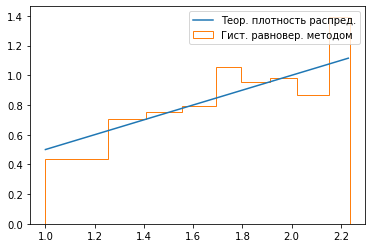

Проверим, выполняется ли контрольное соотношение |1 - sum(p_i)| <= 0.01.
|1 - sum(p_i)| = 2.220446049250313e-16

Chi^2:  3.6497023208365063

Кол-во степеней свободы k: 8
Из таблицы хи квадрат выберем значение с уровнем значимости alpha = 0.01 и k = 8

Chi^2(alpha, k) = 20.09

Chi^2(alpha, k) > chi^2, значит, нет оснований отклонять гипотезу о теоретическом законе распределения данной СВ


In [159]:
# число элементов в каждом столбце
v = n // M

plt.plot(t, f(t), label="Теор. плотность распред.")
A = [1] + [y[i * v] for i in range(1, M)] + [math.sqrt(5)]
plt.hist(y, bins = A, density=True, histtype="step", label="Гист. равновер. методом")
plt.legend(loc="best")
plt.show()

p_i = [F(A[i+1]) - F(A[i]) for i in range(0,M)] #теоретическая вероятность попадания случайной величины в i-ый интервал 
print("Проверим, выполняется ли контрольное соотношение |1 - sum(p_i)| <= 0.01.\n|1 - sum(p_i)| =", abs(1 - sum(p_i)))

p = v / n # частота попадания в i-ый интервал
chi_sq = [(p_i[i] - p)**2 / p_i[i] for i in range(0, M)]
chi_sq = sum(chi_sq) * n
print("\nChi^2: ", chi_sq)

k = M - 1 - 0 #Значение S = 0, так как закон распределения не зависит ни от каких параметро

print("\nКол-во степеней свободы k:", k)
print("Из таблицы хи квадрат выберем значение с уровнем значимости alpha = 0.01 и k =", k)
print("\nChi^2(alpha, k) = 20.09")
print("\nChi^2(alpha, k) > chi^2, значит, нет оснований отклонять гипотезу о теоретическом законе распределения данной СВ")

### Задание 2. 
Сформировать выборку из 30 чисел. Проверить гипотезу о соответствии выборке теоретического закона распределения по критерию согласия Колмогорова.


In [160]:
n = 30
M = 5 #sqrt(n)

In [161]:
x = sorted([random.uniform(a,b) for i in range(n)])
y = [math.sqrt(value) for value in x]
var_series = sorted(y)

In [162]:
# эмпирическая функция распределения: count(X < x0) / count(X)
emp_func = lambda X, x0: float(len([num for num in X if num < x0])) / len(X)

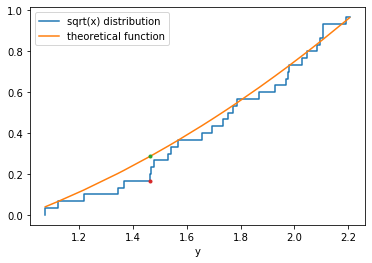

lambda:  0.6565978707712782


In [163]:
emp = [emp_func(y, y0) for y0 in var_series]
theor = [F(val) for val in y]

# delta - максимальная разность между эмпирической и теор. ф распределения
delta, index = max([(abs(theor[i] - emp[i]), i) for i in range(n)])

plt.step(var_series, emp, label="sqrt(x) distribution")
plt.plot(y, theor, label="theoretical function")
plt.plot(var_series[index], theor[index] , ".", var_series[index], emp[index], ".")
plt.legend(loc="best")
plt.xlabel('y')
plt.show()

# вычисляем значение критерия лямбда
lambd = math.sqrt(n) * delta 

print ("lambda: ",lambd)

Уровень значимости $\alpha$ = 0.01. Тогда, доверительная вероятность $\beta$ = 1 - $\alpha$ = 0.99.
Из табл. функции Колмогорова выберем критическое значение $\lambda_\beta$ = 1.63

Т.к. lambda < $\lambda_\beta$, то у нас нет оснований отклонять выдвинутую гипотезу.

### Задание 3.
Сформировать выборку из 50 чисел. Проверить гипотезу о соответствии выборке теоретического закона распределения по критерию согласия Мизеса.

In [164]:
n = 50
M = 7 #sqrt(n)

In [165]:
x = sorted([random.uniform(a,b) for i in range(n)])
y = sorted([math.sqrt(value) for value in x])

In [166]:
emp = []
theor = []
squared_deviation = []

for i in range(1, n+1):
    emp.append((i - 0.5) / n)
    theor.append(F(y[i-1]))
    squared_deviation.append((emp[i-1] - theor[i-1])**2)
    
table = pd.DataFrame(
    {
        "$y_i$": y,
        "$F_i$": emp,
        "$F$": theor,
        "$\delta$": squared_deviation
    }
)
table

,$y_i$,$F_i$,$F$,$\delta$
0,1.127563,0.01,0.067850,0.003347
1,1.169839,0.03,0.092131,0.003860
2,1.175722,0.05,0.095581,0.002078
3,1.193873,0.07,0.106333,0.001320
4,1.217491,0.09,0.120571,0.000935
5,1.296331,0.11,0.170118,0.003614
6,1.336542,0.13,0.196586,0.004434
7,1.354960,0.15,0.208979,0.003479
8,1.483411,0.17,0.300127,0.016933
9,1.524574,0.19,0.331082,0.019904


In [167]:
print("Фактическое значение статистики")
print(1. / (12 * n) + sum(squared_deviation))

Фактическое значение статистики
0.18711962724514627


Критическое значение статистики Мизеса на уровне значимости $\alpha=0.01$ по таблице равно $n\sigma^2_{\alpha}=0.744$.

Получили, что фактическое значение меньше критического. Значит, гипотеза не противоречит имеющимся данным